In [51]:
import requests, json, time, fastbook
fastbook.setup_book()

In [52]:
from fastbook import *
from fastai.vision.widgets import *

In [53]:
emotions_data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [54]:
emotions = emotions_data_block.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [55]:
path = Path('img/FAST_AI')
dls = emotions.dataloaders(path)

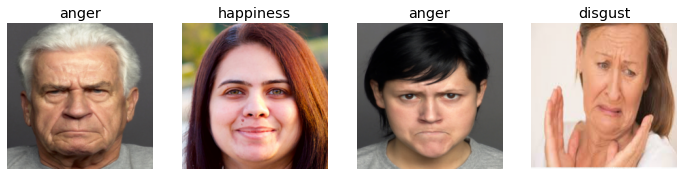

In [56]:
dls.valid.show_batch(max_n=4, nrows=1)

In [57]:
!wget -c --no-check-certificate -P /home/iuri/.cache/torch/hub/checkpoints/ https://download.pytorch.org/models/resnet34-b627a593.pth

--2021-10-22 01:45:39--  https://download.pytorch.org/models/resnet34-b627a593.pth
SSL_INIT
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving download.pytorch.org (download.pytorch.org)... 2600:9000:214e:9c00:d:607e:4540:93a1, 2600:9000:214e:5400:d:607e:4540:93a1, 2600:9000:214e:5600:d:607e:4540:93a1, ...
Connecting to download.pytorch.org (download.pytorch.org)|2600:9000:214e:9c00:d:607e:4540:93a1|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [58]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(12)

epoch,train_loss,valid_loss,accuracy,time
0,3.104789,3.260921,0.200000,00:28


epoch,train_loss,valid_loss,accuracy,time
0,2.475356,2.914860,0.233333,00:36
1,2.734863,2.632045,0.300000,00:32
2,2.907837,2.420902,0.366667,00:32
3,2.736064,2.254679,0.400000,00:35
4,2.609465,2.104751,0.400000,00:34
5,2.491308,1.959976,0.433333,00:25
6,2.307866,1.842753,0.433333,00:26
7,2.110185,1.725131,0.400000,00:30
8,1.988429,1.640890,0.400000,00:37
9,1.881756,1.591388,0.500000,00:34


In [59]:
learn.dls.vocab

['anger', 'disgust', 'fear', 'happiness', 'neutrality', 'sadness']

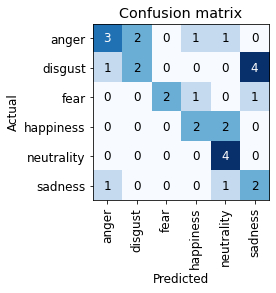

In [60]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

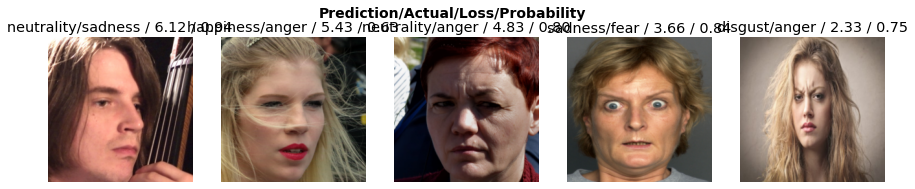

In [61]:
interp.plot_top_losses(5, nrows=1)